In [2]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from src.loaders import load_data, load_labels
from src.classify import MCM_Classifier
import os
import src.plot as myplot
import scipy.ndimage as ndi

In [3]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [4]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

In [5]:
# Ps = classifier.get_P() # category, icc in MCM, 2**rank_icc probability distribution
# MCMs = classifier.get_MCMs()
# Counts = classifier.get_Counts()
# N = Counts[0][0].sum().astype(int) 

In [6]:
digit = 0

sample_sizes = [6315]

path_format = "../OUTPUT/sample_sizes_fromfull"

counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, "",path_format)
counts_samplesizes, mcms_samplesizes = counts_samplesizes[0][0], mcms_samplesizes[0][0]

In [7]:
Counts = counts_samplesizes
MCMs = mcms_samplesizes
N = sample_sizes[0]


In [8]:
evds = []
comms = []
mcm_idxs =np.arange(10)
cmap = myplot.cmap_to_gray("royalblue", reverse=False)

for mcm_idx in mcm_idxs:
    comms.append(myplot.generate_icc_comms_map(MCMs[mcm_idx]))
    evd = utils.evidence_iccs(Counts,MCMs,mcm_idx)
    evd = utils.pixelwise_evidence(evd,N,MCMs[mcm_idx]) 
    evds.append(evd)

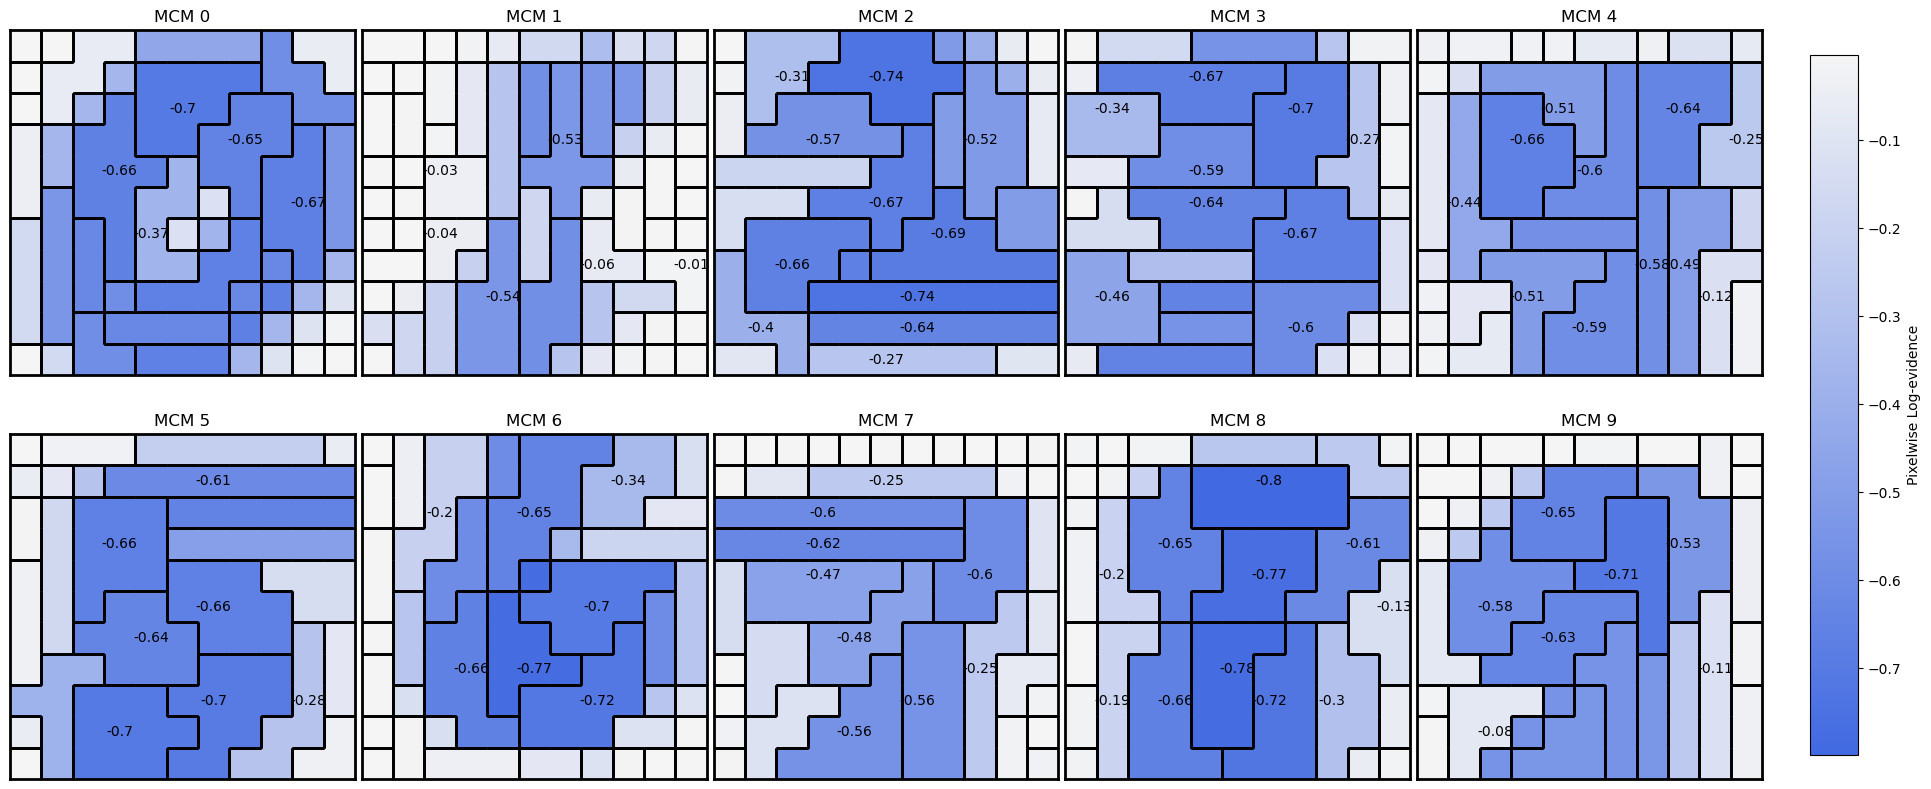

In [9]:
# for mcm_idxs in [[0,1,2,3],[4,5,6,7],[8,9,0,0]]:
scale = 2
fig, axs  = plt.subplots(2,5,figsize=(12*scale,5*scale))
axs = axs.flatten()



global_vbounds = np.min([np.min(i) for i in evds]), np.max([np.max(i) for i in evds])

for ax_i, mcm_idx in enumerate(mcm_idxs):
    val_matrix = evds[ax_i][comms[ax_i]]
    axs[ax_i].set_title("MCM %d" % (mcm_idx))
    im = myplot.partition_map(axs[ax_i],val_matrix,None,myplot.find_borders(comms[ax_i]),drawing_cond=lambda x: True,
                                normalise=False,global_vbounds=global_vbounds,cbar=False,cmap=cmap)    
    myplot.label_communities(comms[ax_i],axs[ax_i],evds[ax_i].round(2),color="black") 
                    
# fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
#                     wspace=0.02, hspace=0.02)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.83,
                    wspace=0.02, hspace=0.02)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig("test.png", dpi=300, bbox_inches="tight")

cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Pixelwise Log-evidence')


# plt.suptitle("Pixelwise log-evidence")
# plt.tight_layout()
plt.savefig("../figures/paper_evidence_pixelwise.png",dpi=300,bbox_inches="tight")



- Pixelwise log-evidence for each icc (/log(2)/nr_images/nr_pixel_in_icc)
- grey areas have highest values -> are most compressible ones
- may be that these areas are very indivative as they are usually not part of the digit. So if they are lit, then its likly not the same digit (see MCM1 vs MCM0 for example.)

IndexError: index 4 is out of bounds for axis 0 with size 4

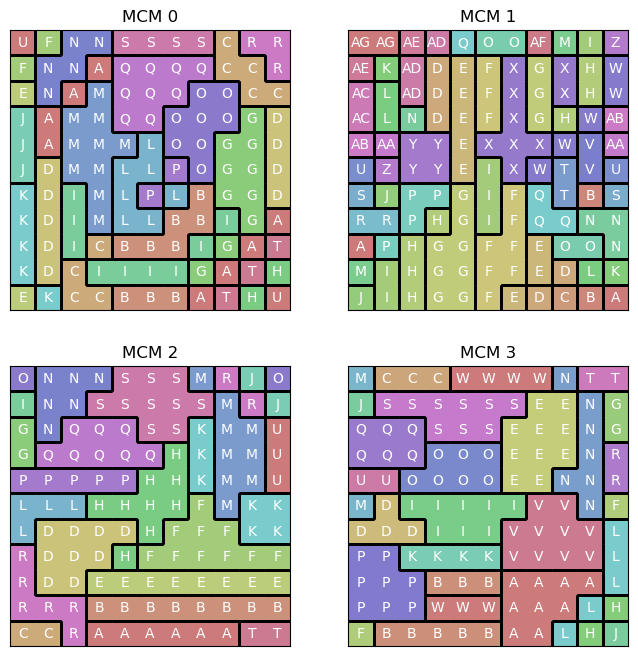

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()
for i in range(10):  
    myplot.plot_communities(axs[i],comms[i],myplot.int_to_letters(comms[i]) ,f"MCM {i}")
plt.show()

In [ ]:
# # Customizable environment variables
# n_categories = 10  # Number of categories to be classified
# n_variables = 121  # Number of variables in the dataset
# mcm_filename_format = "train-images-unlabeled-{}_bootstrap_comms.dat"
# data_filename_format = "train-images-unlabeled-{}.dat"
# data_path = "../all_INPUT/data/"
# communities_path = "../OUTPUT/comms/"
# output_path = "../OUTPUT/"
# print("{:-^50}".format("  MCM-Classifier  ")) 

# # test_data = load_data("../INPUT/data/test-images-unlabeled-all-uniform.txt").astype(int)
# # test_labels = load_labels("../INPUT/data/test-labels-uniform.txt").astype(int)

# # Step 1: Initialize classifier
# classifier = MCM_Classifier(n_categories, n_variables, mcm_filename_format, data_filename_format, data_path, communities_path)

# # Step 2: Train
# classifier.fit(greedy=True, max_iter=1000000, max_no_improvement=100000)


# # # Step 3: Evaluate
# # predicted_classes, probs = classifier.predict(test_data, test_labels)

# # # Step 4: Save classification report and other stats
# # # report = classifier.get_classification_report(test_labels)
# # classifier.save_classification_report(test_labels,path=output_path)

# # if (classifier.stats == None):
# #     raise Exception("Classifier stats not found. Did you forget to call predict()?")
